Rudraksh Singh E22CSEU0010 LAB 4

Text(0, 0.5, 'Frequency')

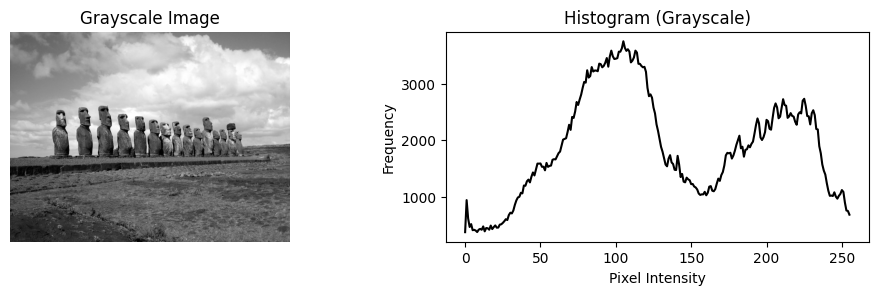

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

image = cv2.imread('image.jpeg')
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# grayscale
gray_image = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)

# histogram for grayscale image
hist_gray = cv2.calcHist([gray_image], [0], None, [256], [0, 256])

# histograms for color channels
hist_r = cv2.calcHist([image], [0], None, [256], [0, 256])
hist_g = cv2.calcHist([image], [1], None, [256], [0, 256])
hist_b = cv2.calcHist([image], [2], None, [256], [0, 256])

#grayscale image histogram
plt.figure(figsize=(12, 6))
plt.subplot(2, 2, 1)
plt.imshow(gray_image, cmap='gray')
plt.title("Grayscale Image")
plt.axis('off')

plt.subplot(2, 2, 2)
plt.plot(hist_gray, color='black')
plt.title("Histogram (Grayscale)")
plt.xlabel("Pixel Intensity")
plt.ylabel("Frequency")

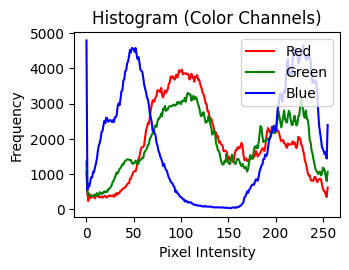

In [2]:
# histograms for color channels
plt.subplot(2, 2, 3)
plt.plot(hist_r, color='red', label="Red")
plt.plot(hist_g, color='green', label="Green")
plt.plot(hist_b, color='blue', label="Blue")
plt.title("Histogram (Color Channels)")
plt.xlabel("Pixel Intensity")
plt.ylabel("Frequency")
plt.legend()

plt.tight_layout()
plt.show()

# Histogram Equalization on Grayscale Image
equalized_gray = cv2.equalizeHist(gray_image)
hist_equalized = cv2.calcHist([equalized_gray], [0], None, [256], [0, 256])

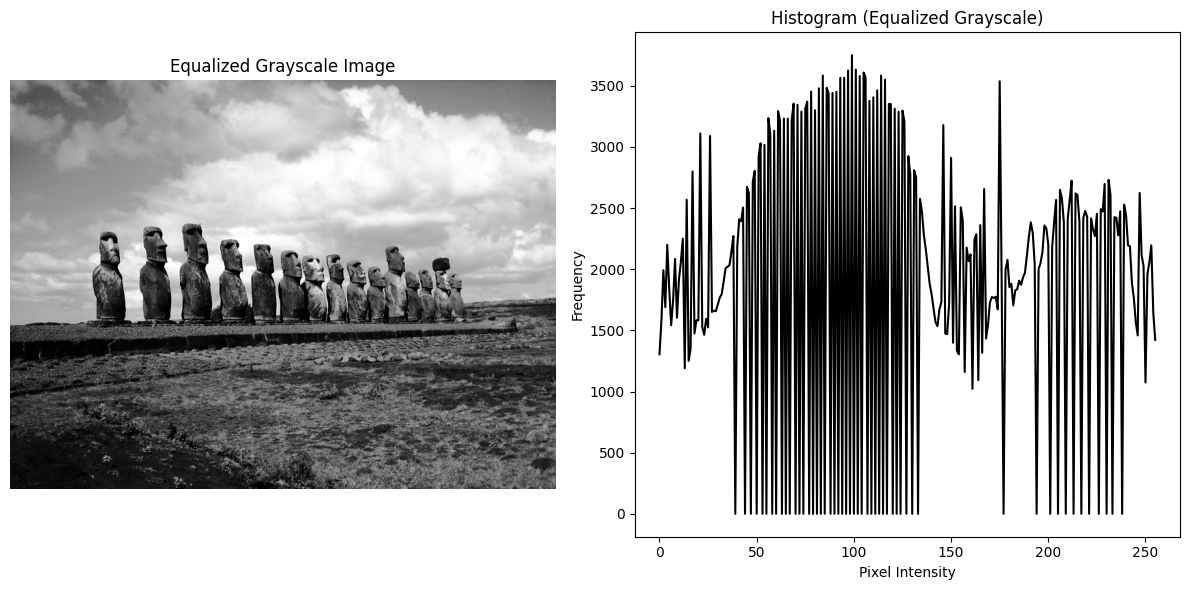

In [3]:
# Equalized Image and its Histogram
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.imshow(equalized_gray, cmap='gray')
plt.title("Equalized Grayscale Image")
plt.axis('off')

plt.subplot(1, 2, 2)
plt.plot(hist_equalized, color='black')
plt.title("Histogram (Equalized Grayscale)")
plt.xlabel("Pixel Intensity")
plt.ylabel("Frequency")

plt.tight_layout()
plt.show()

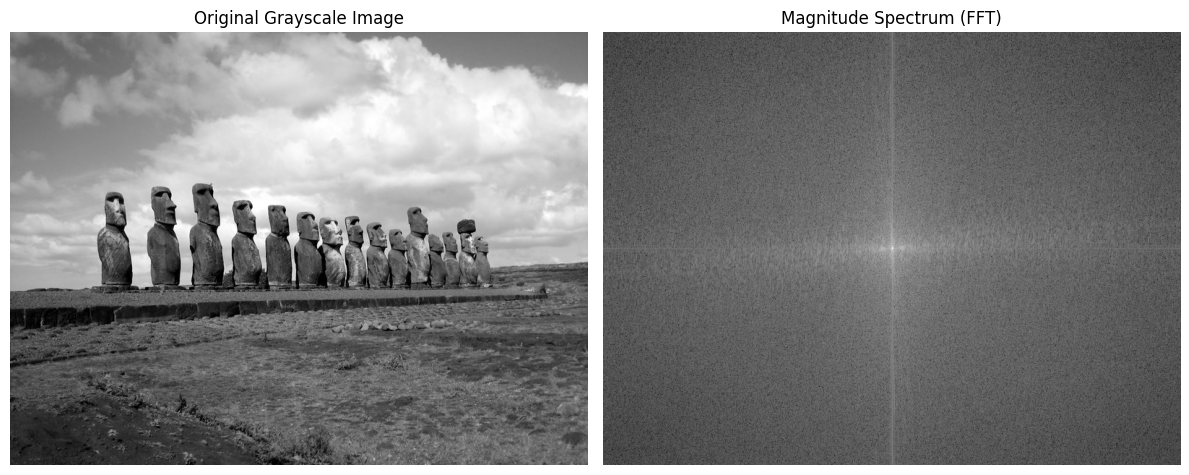

In [4]:
# grayscale image
image_gray = cv2.imread('image.jpeg', cv2.IMREAD_GRAYSCALE)

# FFT and shift zero frequency component to the center
dft = np.fft.fft2(image_gray)
dft_shift = np.fft.fftshift(dft)

# Compute magnitude spectrum
magnitude_spectrum = 20 * np.log(np.abs(dft_shift) + 1)

# original image and its magnitude spectrum
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.imshow(image_gray, cmap='gray')
plt.title("Original Grayscale Image")
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(magnitude_spectrum, cmap='gray')
plt.title("Magnitude Spectrum (FFT)")
plt.axis('off')

plt.tight_layout()
plt.show()

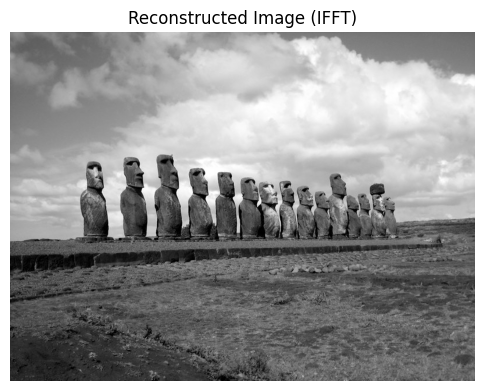

In [5]:
# Inverse Fourier Transform (IFFT)
idft_shift = np.fft.ifftshift(dft_shift)
image_reconstructed = np.fft.ifft2(idft_shift)
image_reconstructed = np.abs(image_reconstructed)

# reconstructed image
plt.figure(figsize=(6, 6))
plt.imshow(image_reconstructed, cmap='gray')
plt.title("Reconstructed Image (IFFT)")
plt.axis('off')
plt.show()

In [6]:
# Rotate image 45 degrees
(h, w) = image_gray.shape
center = (w // 2, h // 2)
M = cv2.getRotationMatrix2D(center, 45, 1.0)
rotated_image = cv2.warpAffine(image_gray, M, (w, h))

# FFT of rotated image
dft_rotated = np.fft.fft2(rotated_image)
dft_rotated_shift = np.fft.fftshift(dft_rotated)
magnitude_spectrum_rotated = 20 * np.log(np.abs(dft_rotated_shift) + 1)

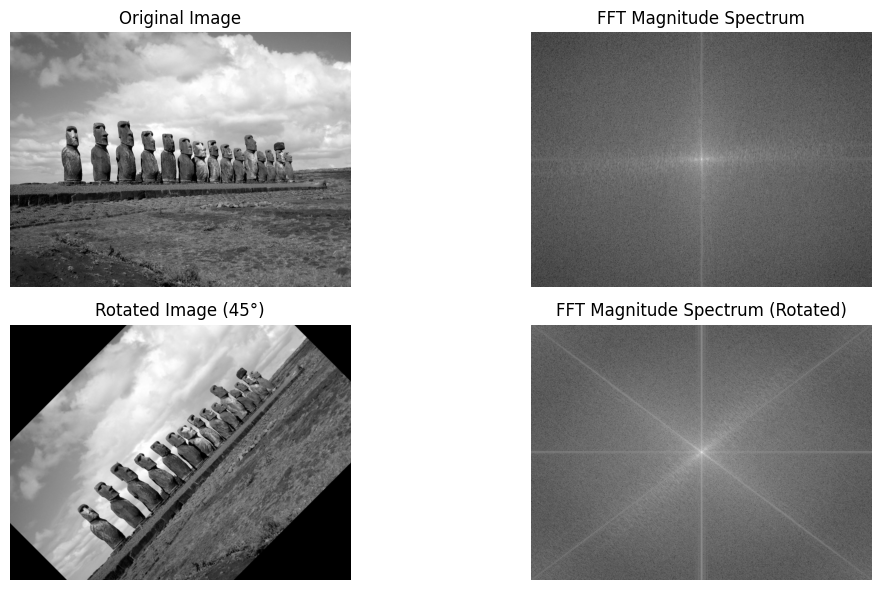

In [7]:
# original, rotated, and their respective magnitude spectrums
plt.figure(figsize=(12, 6))
plt.subplot(2, 2, 1)
plt.imshow(image_gray, cmap='gray')
plt.title("Original Image")
plt.axis('off')

plt.subplot(2, 2, 2)
plt.imshow(magnitude_spectrum, cmap='gray')
plt.title("FFT Magnitude Spectrum")
plt.axis('off')

plt.subplot(2, 2, 3)
plt.imshow(rotated_image, cmap='gray')
plt.title("Rotated Image (45°)")
plt.axis('off')

plt.subplot(2, 2, 4)
plt.imshow(magnitude_spectrum_rotated, cmap='gray')
plt.title("FFT Magnitude Spectrum (Rotated)")
plt.axis('off')

plt.tight_layout()
plt.show()